In [1]:
import sys
import os
os.chdir("/home/kreffert/Probabilistic_LTSF/ProbTS")
from run import ProbTSCli
from probts.data import DataManager, ProbTSDataModule
from probts.utils import find_best_epoch
from probts.model.forecast_module import ProbTSForecastModule
from notebook.utils import plot_time_series, get_predictions, plot_qq_coverage

# PATCHTST

In [2]:
DATASET = 'etth1'
MODEL = 'patchtst'
args={'config': f'config/ltsf/{DATASET}/{MODEL}.yaml', 
        'seed_everything':0,
       'data.data_manager.init_args.path': './datasets',
       'trainer.default_root_dir': './log_dir',
       'data.data_manager.init_args.dataset':f'{DATASET}',
       'data.data_manager.init_args.split_val': True,
       'trainer.max_epochs':50,
       'data.data_manager.init_args.context_length':96,
       'data.data_manager.init_args.prediction_length':96,
     'model.forecaster.no_training':True,
     'model.load_from_ckpt': "/home/kreffert/Probabilistic_LTSF/ProbTS/log_dir/etth1_PatchTST_prob_CTX96_PRED96_seed0_Feb21_0904/ckpt/",
     }

sys.argv = ['run.py']

sys.argv += [item for k, v in args.items() for item in (f'--{k}', str(v))]

cli = ProbTSCli(
        datamodule_class=ProbTSDataModule,
        model_class=ProbTSForecastModule,
        save_config_kwargs={"overwrite": True},
        run=False
    )

model = cli.model
data_module = cli.datamodule
trainer = cli.trainer
cli.init_exp()


inference=True
folder_path = "/home/kreffert/Probabilistic_LTSF/ProbTS/log_dir/etth1_PatchTST_CTX96_PRED96_seed0/ckpt/"
best_path = find_best_epoch(folder_path)[1]
print(folder_path + best_path)
cli.checkpoint_callback.best_model_path = folder_path + best_path
cli.set_test_mode()
cli.trainer.test(model=cli.model, datamodule=cli.datamodule)

[rank: 0] Seed set to 0
INFO:root:first/last timestamp found: 2016-07-01 00:00/2017-06-25 23:00
INFO:root:group training time series to datasets
INFO:root:first/last timestamp found: 2016-07-01 00:00/2017-10-23 23:00
INFO:root:group training time series to datasets
INFO:root:first/last timestamp found: 2016-07-01 00:00/2018-02-20 23:00
INFO:root:group training time series to datasets
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Loading Long-term Dataset: etth1
val  pred_len: 96 : num_test_windows: 29
test  pred_len: 96 : num_test_windows: 29
Test context length: [96], prediction length: [96]
Validation context length: [96], prediction length: [96]
Training context length: [96], prediction lengths: [96]
Test rolling length: 96
Variable-specific normalization: True
sampling_weight_scheme: none


INFO:run:Root dir is log_dir, exp tag is etth1_PatchTST_CTX96_PRED96_seed0_Feb21_0918
INFO:run:Loading best checkpoint from /home/kreffert/Probabilistic_LTSF/ProbTS/log_dir/etth1_PatchTST_CTX96_PRED96_seed0/ckpt/epoch=45-val_CRPS=0.331355.ckpt


/home/kreffert/Probabilistic_LTSF/ProbTS/log_dir/etth1_PatchTST_CTX96_PRED96_seed0/ckpt/epoch=45-val_CRPS=0.331355.ckpt
sampling_weight_scheme: none


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing DataLoader 0: |                                                                                                                                                | 1/? [00:06<00:00,  0.15it/s]


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│       96_test_CRPS        │    0.3216273784637451     │
│     96_test_CRPS-Sum      │    0.2648713290691376     │
│       96_test_MASE        │    1.0666345357894897     │
│        96_test_MSE        │     8.536240577697754     │
│      96_test_MSE-Sum      │    107.16936492919922     │
│        96_test_ND         │    0.3216273784637451     │
│      96_test_ND-Sum       │    0.2648713290691376     │
│       96_test_NRMSE       │     0.599078357219696     │
│     96_test_NRMSE-Sum     │    0.3553072512149811     │
│    96_test_weighted_ND    │    0.3216273784637451     │
│  96_test_weighted_ND-Sum  │    0.2648713290691376     │
└───────────────────────────┴───────────────────────────┘

[{'96_test_ND': 0.3216273784637451,
  '96_test_ND-Sum': 0.2648713290691376,
  '96_test_weighted_ND': 0.3216273784637451,
  '96_test_weighted_ND-Sum': 0.2648713290691376,
  '96_test_CRPS': 0.3216273784637451,
  '96_test_CRPS-Sum': 0.2648713290691376,
  '96_test_NRMSE': 0.599078357219696,
  '96_test_NRMSE-Sum': 0.3553072512149811,
  '96_test_MSE': 8.536240577697754,
  '96_test_MSE-Sum': 107.16936492919922,
  '96_test_MASE': 1.0666345357894897}]

torch.Size([29, 264, 7])
torch.Size([29, 96, 7])
torch.Size([29, 1, 96, 7])
torch.Size([29, 96, 7])


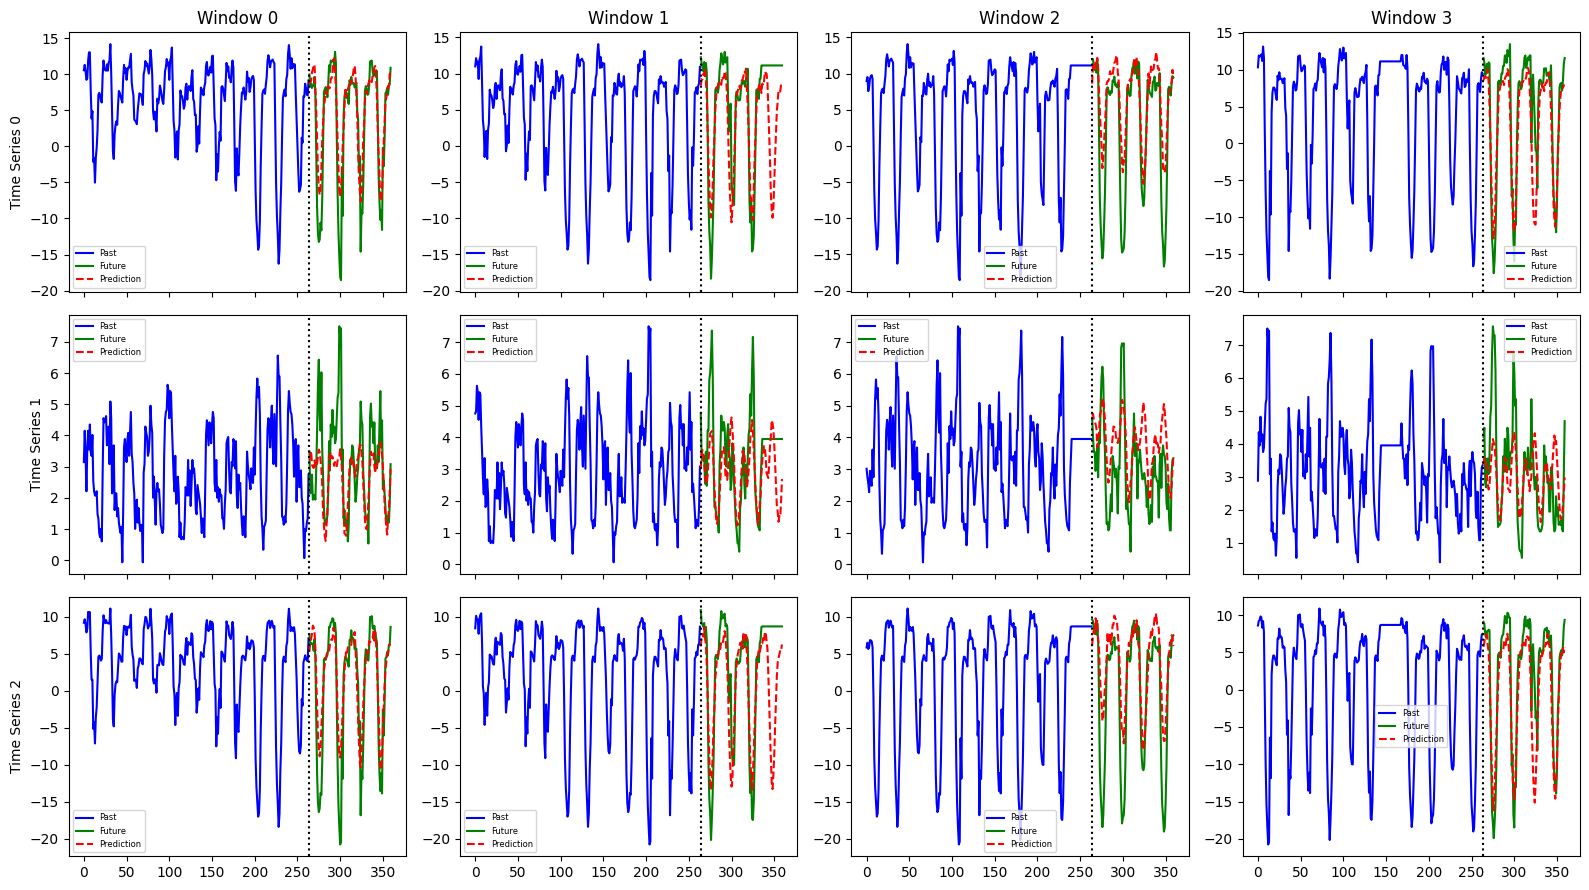

In [3]:
predictions, past_actuals, future_actuals = get_predictions(cli)
plot_time_series(past_actuals, future_actuals, predictions, windows=[0, 1, 2, 3], series=[0, 1, 2], ci=None)

# Probabilistic model - TimeGrad (Rnn-based Diffusion model)

In [ ]:
DATASET = 'etth1'
MODEL = 'timegrad'
args={'config': f'config/ltsf/{DATASET}/{MODEL}.yaml', 
        'seed_everything':0,
       'data.data_manager.init_args.path': './datasets',
       'trainer.default_root_dir': './log_dir',
       'data.data_manager.init_args.dataset':f'{DATASET}',
       'data.data_manager.init_args.split_val': True,
       'trainer.max_epochs':50,
       'data.data_manager.init_args.context_length':96,
       'data.data_manager.init_args.prediction_length':96}

sys.argv = ['run.py']

sys.argv += [item for k, v in args.items() for item in (f'--{k}', str(v))]

print(sys.argv)
cli = ProbTSCli(
        datamodule_class=ProbTSDataModule,
        model_class=ProbTSForecastModule,
        save_config_kwargs={"overwrite": True},
        run=False
    )
# cli.run()
cli.init_exp()
model = cli.model
data_module = cli.datamodule
trainer = cli.trainer

inference=True
path="/home/kreffert/Probabilistic_LTSF/ProbTS/log_dir/etth1_TimeGrad_CTX96_PRED96_seed0/ckpt/epoch=14-val_CRPS=0.299012.ckpt"
cli.checkpoint_callback.best_model_path = path
cli.set_test_mode()
cli.trainer.test(model=cli.model, datamodule=cli.datamodule)

[rank: 0] Seed set to 0


['run.py', '--config', 'config/ltsf/etth1/timegrad.yaml', '--seed_everything', '0', '--data.data_manager.init_args.path', './datasets', '--trainer.default_root_dir', './log_dir', '--data.data_manager.init_args.dataset', 'etth1', '--data.data_manager.init_args.split_val', 'True', '--trainer.max_epochs', '50', '--data.data_manager.init_args.context_length', '96', '--data.data_manager.init_args.prediction_length', '96']


INFO:root:first/last timestamp found: 2016-07-01 00:00/2017-06-25 23:00
INFO:root:group training time series to datasets
INFO:root:first/last timestamp found: 2016-07-01 00:00/2017-10-23 23:00
INFO:root:group training time series to datasets
INFO:root:first/last timestamp found: 2016-07-01 00:00/2018-02-20 23:00
INFO:root:group training time series to datasets
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Loading Long-term Dataset: etth1
val  pred_len: 96 : num_test_windows: 29
test  pred_len: 96 : num_test_windows: 29
Test context length: [96], prediction length: [96]
Validation context length: [96], prediction length: [96]
Training context length: [96], prediction lengths: [96]
Test rolling length: 96
sampling_weight_scheme: none


INFO:run:Root dir is log_dir, exp tag is etth1_TimeGrad_CTX96_PRED96_seed0_Feb21_0919
INFO:run:Loading best checkpoint from /home/kreffert/Probabilistic_LTSF/ProbTS/log_dir/etth1_TimeGrad_CTX96_PRED96_seed0/ckpt/epoch=14-val_CRPS=0.299012.ckpt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


sampling_weight_scheme: none
Testing DataLoader 0: |                                                                                                                                                        | 0/? [00:00<?, ?it/s]

In [ ]:
predictions, past_actuals, future_actuals = get_predictions(cli)

In [ ]:
ci = [5, 95]
plot_time_series(past_actuals, future_actuals, predictions, windows=[0, 1, 15, 16], series=[0, 1, 2, 3, 4, 5, 6], ci=ci)

In [ ]:
quantile_levels = [0.01, 0.05, 0.1, 0.2, 0.25, 0.4, 0.5, 0.6, 0.75, 0.8, 0.9, 0.95, 0.99]
plot_qq_coverage(future_actuals, predictions, windows=[0, 1, 15, 16], series=[0, 1, 2, 3, 4, 5, 6], quantile_levels=quantile_levels)#, version='upper')

# PATCHTST Gaussian

In [2]:
DATASET = 'etth1'
MODEL = 'patchtst_prob'
args={'config': f'config/ltsf/{DATASET}/{MODEL}.yaml', 
        'seed_everything':0,
       'data.data_manager.init_args.path': './datasets',
       'trainer.default_root_dir': './log_dir',
       'data.data_manager.init_args.dataset':f'{DATASET}',
       'data.data_manager.init_args.split_val': True,
       'trainer.max_epochs':50,
       'data.data_manager.init_args.context_length':96,
       'data.data_manager.init_args.prediction_length':96,
       'model.forecaster.no_training':True,
     'model.load_from_ckpt': "/home/kreffert/Probabilistic_LTSF/ProbTS/log_dir/etth1_PatchTST_prob_CTX96_PRED96_seed0/ckpt/",}

sys.argv = ['run.py']

sys.argv += [item for k, v in args.items() for item in (f'--{k}', str(v))]

cli = ProbTSCli(
        datamodule_class=ProbTSDataModule,
        model_class=ProbTSForecastModule,
        save_config_kwargs={"overwrite": True},
        run=False
    )
cli.init_exp()
cli.set_test_mode()
cli.trainer.test(model=cli.model, datamodule=cli.datamodule)

[rank: 0] Seed set to 0
INFO:root:first/last timestamp found: 2016-07-01 00:00/2017-06-25 23:00
INFO:root:group training time series to datasets
INFO:root:first/last timestamp found: 2016-07-01 00:00/2017-10-23 23:00
INFO:root:group training time series to datasets
INFO:root:first/last timestamp found: 2016-07-01 00:00/2018-02-20 23:00
INFO:root:group training time series to datasets
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Loading Long-term Dataset: etth1
val  pred_len: 96 : num_test_windows: 29
test  pred_len: 96 : num_test_windows: 29
Test context length: [96], prediction length: [96]
Validation context length: [96], prediction length: [96]
Training context length: [96], prediction lengths: [96]
Test rolling length: 96
Variable-specific normalization: True
sampling_weight_scheme: none


INFO:run:Root dir is log_dir, exp tag is etth1_PatchTST_prob_CTX96_PRED96_seed0_Feb21_1100
INFO:run:Loading pre-trained checkpoint from /home/kreffert/Probabilistic_LTSF/ProbTS/log_dir/etth1_PatchTST_prob_CTX96_PRED96_seed0/ckpt/epoch=49-val_CRPS=0.283364.ckpt


self.model.forecaster.no_training: True
find best ckpt  epoch=49-val_CRPS=0.283364.ckpt
sampling_weight_scheme: none


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


Testing DataLoader 0: |                                                                                                                                                | 1/? [00:11<00:00,  0.09it/s]


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│       96_test_CRPS        │    0.30771809816360474    │
│     96_test_CRPS-Sum      │    0.22206513583660126    │
│       96_test_MASE        │     1.304531455039978     │
│        96_test_MSE        │    11.077550888061523     │
│      96_test_MSE-Sum      │    124.68760681152344     │
│        96_test_ND         │    0.4005759656429291     │
│      96_test_ND-Sum       │    0.2887555658817291     │
│       96_test_NRMSE       │    0.6984689235687256     │
│     96_test_NRMSE-Sum     │    0.38561052083969116    │
│    96_test_weighted_ND    │    0.4005759656429291     │
│  96_test_weighted_ND-Sum  │    0.2887555658817291     │
└───────────────────────────┴───────────────────────────┘

[{'96_test_ND': 0.4005759656429291,
  '96_test_ND-Sum': 0.2887555658817291,
  '96_test_weighted_ND': 0.4005759656429291,
  '96_test_weighted_ND-Sum': 0.2887555658817291,
  '96_test_CRPS': 0.30771809816360474,
  '96_test_CRPS-Sum': 0.22206513583660126,
  '96_test_NRMSE': 0.6984689235687256,
  '96_test_NRMSE-Sum': 0.38561052083969116,
  '96_test_MSE': 11.077550888061523,
  '96_test_MSE-Sum': 124.68760681152344,
  '96_test_MASE': 1.304531455039978}]

torch.Size([29, 264, 7])
torch.Size([29, 96, 7])
torch.Size([29, 99, 96, 7])
torch.Size([29, 99, 96, 7])


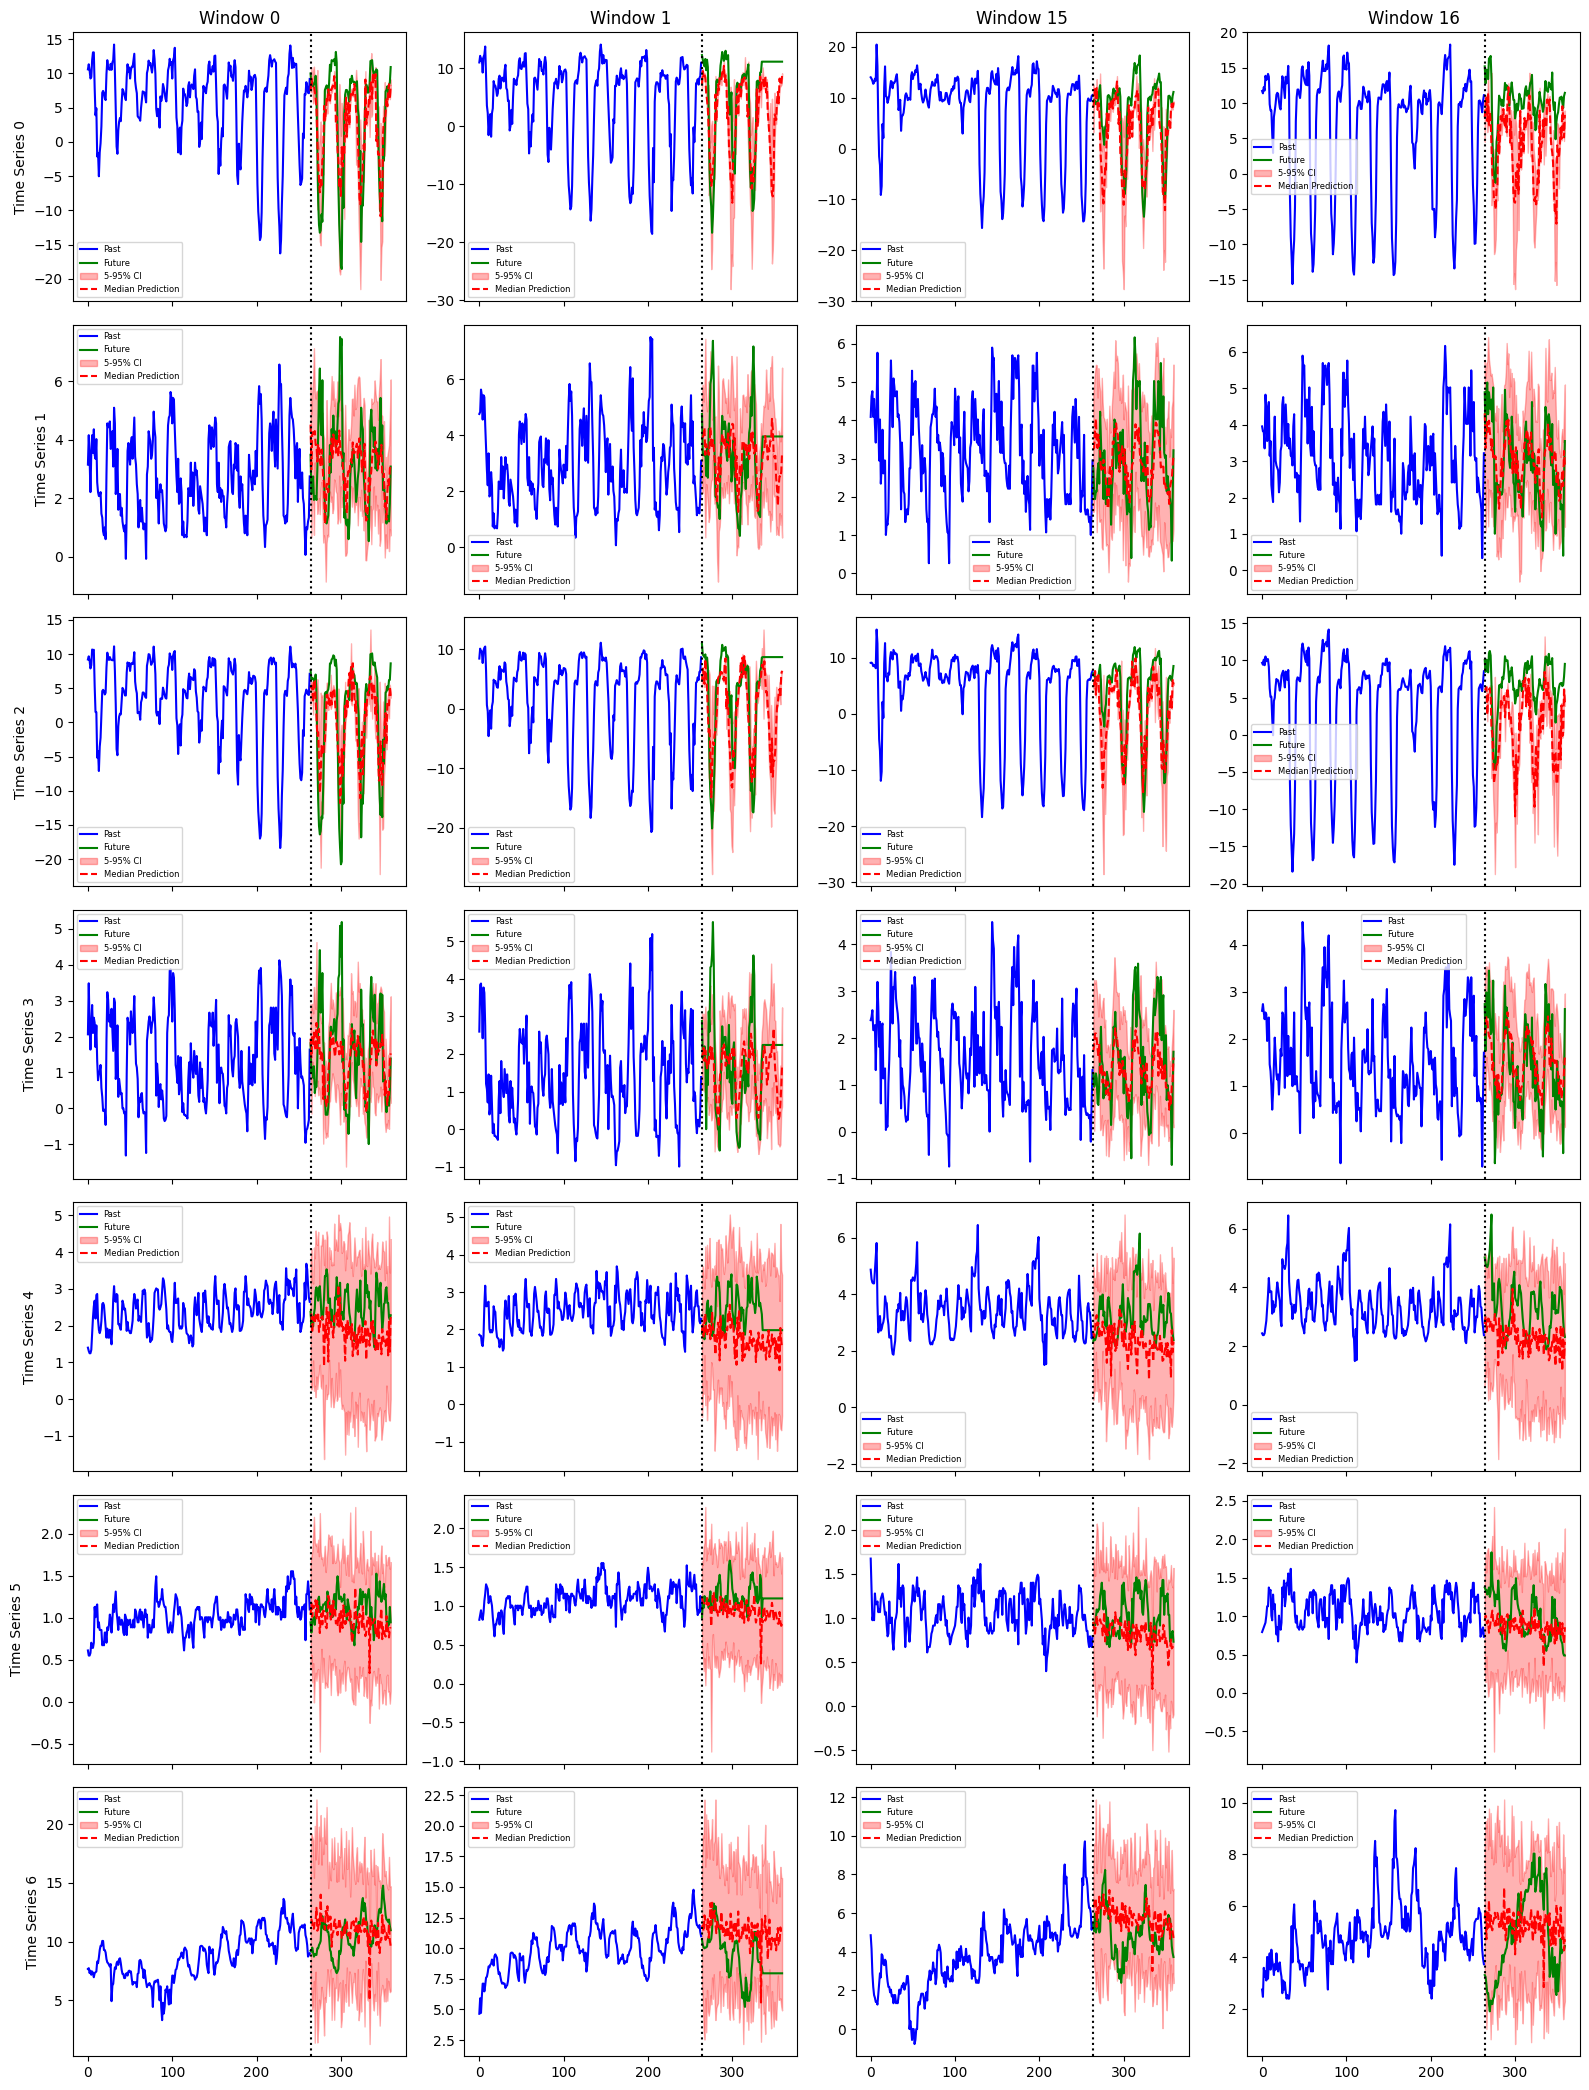

In [3]:
predictions, past_actuals, future_actuals = get_predictions(cli)
ci = [5, 95]
plot_time_series(past_actuals, future_actuals, predictions, windows=[0, 1, 15, 16], series=[0, 1, 2, 3, 4, 5, 6], ci=ci)

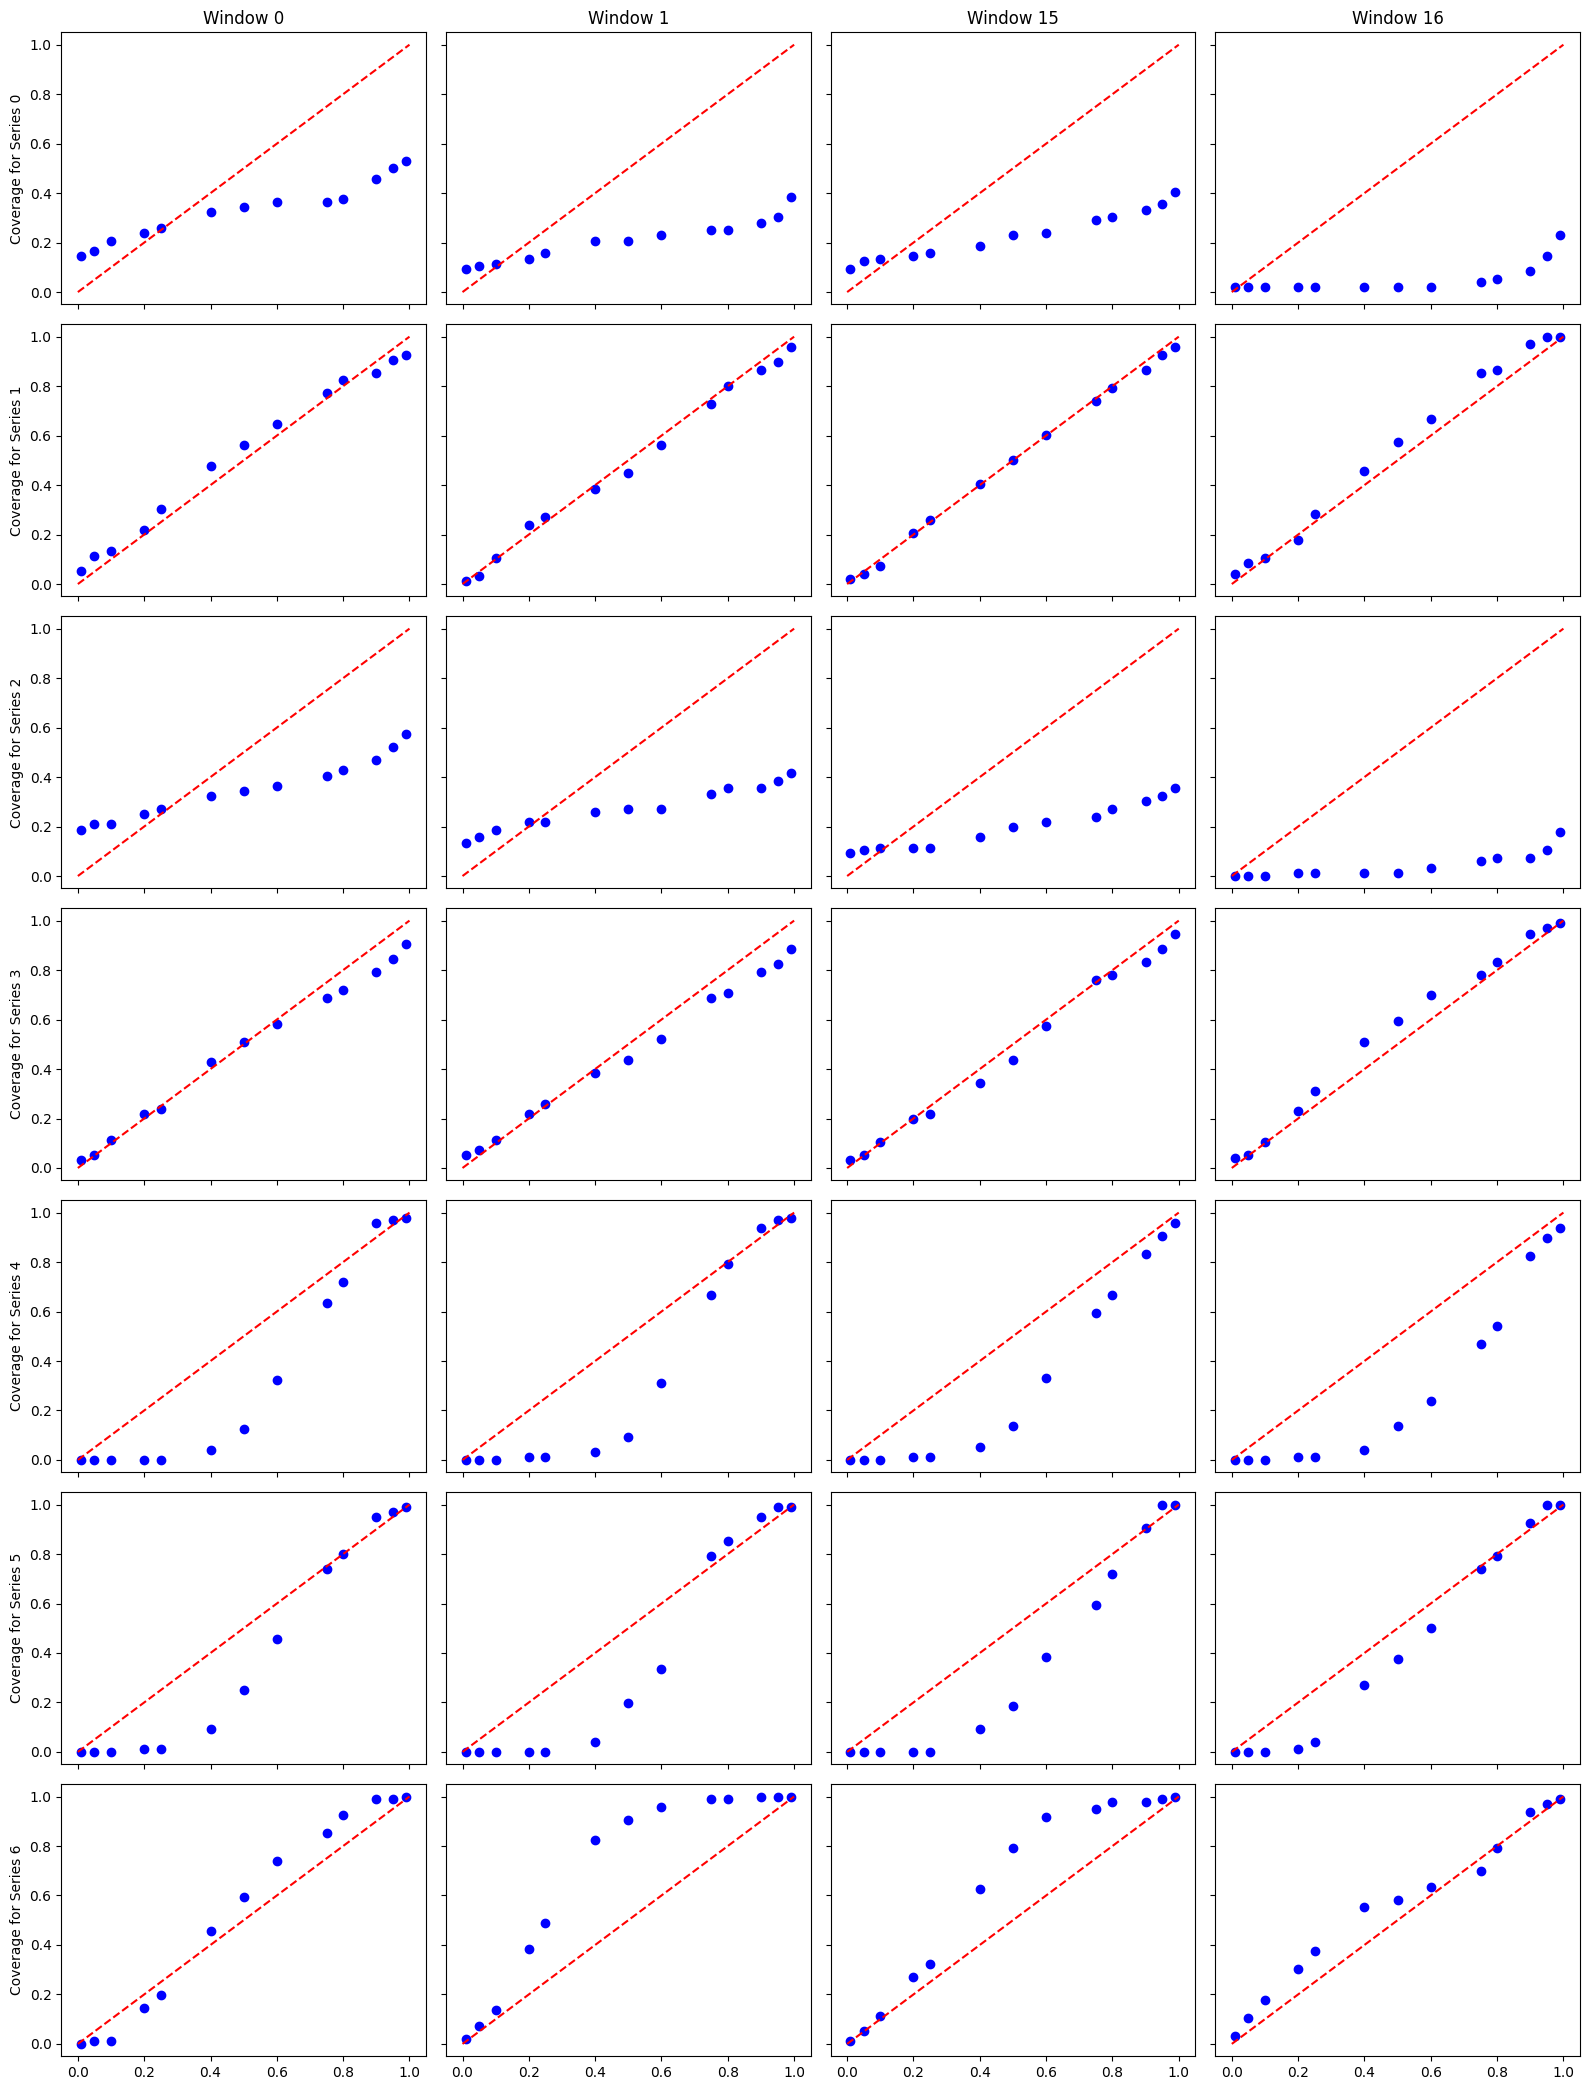

In [4]:
quantile_levels = [0.01, 0.05, 0.1, 0.2, 0.25, 0.4, 0.5, 0.6, 0.75, 0.8, 0.9, 0.95, 0.99]
plot_qq_coverage(future_actuals, predictions, windows=[0, 1, 15, 16], series=[0, 1, 2, 3, 4, 5, 6], quantile_levels=quantile_levels)#, version='upper')

# PatchTST_quantile

In [5]:
DATASET = 'etth1'
MODEL = 'patchtst_prob_q'
args={'config': f'config/ltsf/{DATASET}/{MODEL}.yaml', 
        'seed_everything':0,
       'data.data_manager.init_args.path': './datasets',
       'trainer.default_root_dir': './log_dir',
       'data.data_manager.init_args.dataset':f'{DATASET}',
       'data.data_manager.init_args.split_val': True,
       'trainer.max_epochs':50,
       'data.data_manager.init_args.context_length':96,
       'data.data_manager.init_args.prediction_length':96,
       'model.forecaster.no_training':True,
     'model.load_from_ckpt': "/home/kreffert/Probabilistic_LTSF/ProbTS/log_dir/etth1_PatchTST_prob_CTX96_PRED96_seed0_Feb21_0904/ckpt/",
     }

sys.argv = ['run.py']

sys.argv += [item for k, v in args.items() for item in (f'--{k}', str(v))]

cli = ProbTSCli(
        datamodule_class=ProbTSDataModule,
        model_class=ProbTSForecastModule,
        save_config_kwargs={"overwrite": True},
        run=False
    )

print(cli.model.forecaster.no_training)
print(cli.model.load_from_ckpt)
cli.init_exp(logging=False)
cli.set_test_mode()
cli.trainer.test(model=cli.model, datamodule=cli.datamodule)

[rank: 0] Seed set to 0
INFO:root:first/last timestamp found: 2016-07-01 00:00/2017-06-25 23:00
INFO:root:group training time series to datasets
INFO:root:first/last timestamp found: 2016-07-01 00:00/2017-10-23 23:00
INFO:root:group training time series to datasets
INFO:root:first/last timestamp found: 2016-07-01 00:00/2018-02-20 23:00
INFO:root:group training time series to datasets
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Loading Long-term Dataset: etth1
val  pred_len: 96 : num_test_windows: 29
test  pred_len: 96 : num_test_windows: 29
Test context length: [96], prediction length: [96]
Validation context length: [96], prediction length: [96]
Training context length: [96], prediction lengths: [96]
Test rolling length: 96
Variable-specific normalization: True
sampling_weight_scheme: none
True
/home/kreffert/Probabilistic_LTSF/ProbTS/log_dir/etth1_PatchTST_prob_CTX96_PRED96_seed0_Feb21_0904/ckpt/


INFO:run:Loading pre-trained checkpoint from /home/kreffert/Probabilistic_LTSF/ProbTS/log_dir/etth1_PatchTST_prob_CTX96_PRED96_seed0_Feb21_0904/ckpt/epoch=48-val_CRPS=0.201311.ckpt


find best ckpt  epoch=48-val_CRPS=0.201311.ckpt
sampling_weight_scheme: none


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


Testing DataLoader 0: |                                                                                                                                                | 1/? [00:02<00:00,  0.38it/s]


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│       96_test_CRPS        │    0.2111111581325531     │
│     96_test_CRPS-Sum      │    0.17039449512958527    │
│       96_test_MASE        │     1.14657461643219      │
│        96_test_MSE        │     9.074857711791992     │
│      96_test_MSE-Sum      │     107.8847427368164     │
│        96_test_ND         │    0.34825342893600464    │
│      96_test_ND-Sum       │    0.2677539587020874     │
│       96_test_NRMSE       │    0.6259714961051941     │
│     96_test_NRMSE-Sum     │    0.35725608468055725    │
│    96_test_weighted_ND    │    0.34825342893600464    │
│  96_test_weighted_ND-Sum  │    0.2677539587020874     │
└───────────────────────────┴───────────────────────────┘

[{'96_test_ND': 0.34825342893600464,
  '96_test_ND-Sum': 0.2677539587020874,
  '96_test_weighted_ND': 0.34825342893600464,
  '96_test_weighted_ND-Sum': 0.2677539587020874,
  '96_test_CRPS': 0.2111111581325531,
  '96_test_CRPS-Sum': 0.17039449512958527,
  '96_test_NRMSE': 0.6259714961051941,
  '96_test_NRMSE-Sum': 0.35725608468055725,
  '96_test_MSE': 9.074857711791992,
  '96_test_MSE-Sum': 107.8847427368164,
  '96_test_MASE': 1.14657461643219}]

torch.Size([29, 264, 7])
torch.Size([29, 96, 7])
torch.Size([29, 96, 7, 13])
torch.Size([29, 96, 7, 13])


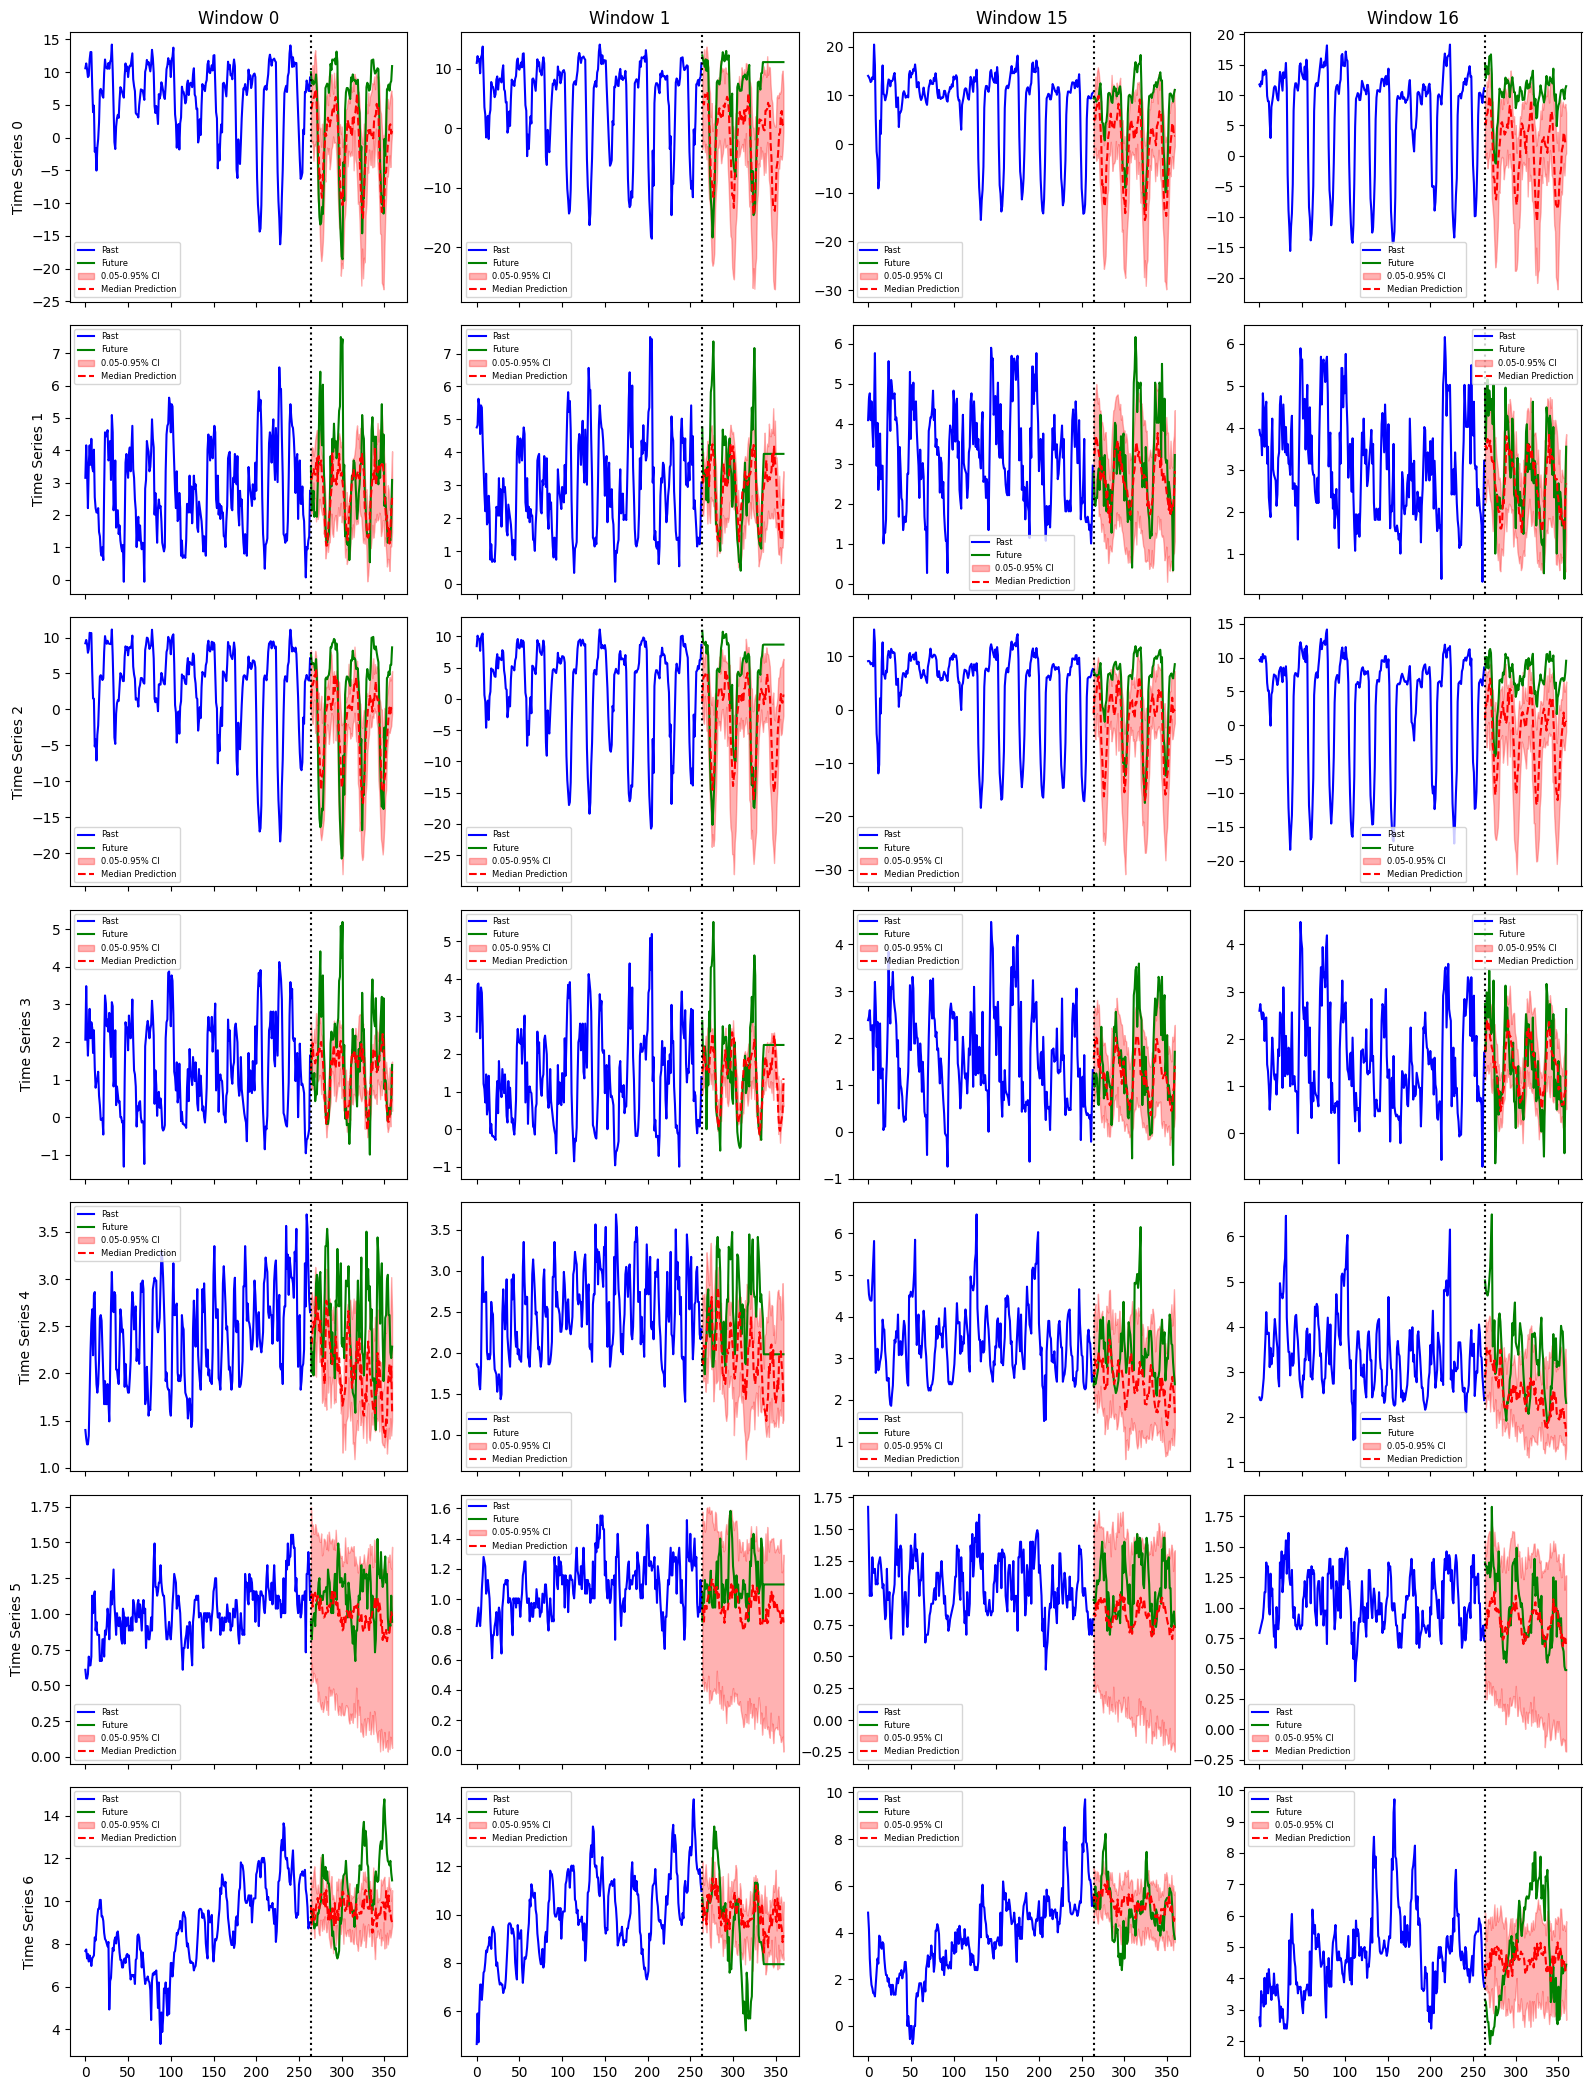

In [8]:
predictions, past_actuals, future_actuals = get_predictions(cli)
quantile_levels = [0.01, 0.05, 0.1, 0.2, 0.25, 0.4, 0.5, 0.6, 0.75, 0.8, 0.9, 0.95, 0.99]
ci = [5, 95]
plot_time_series(past_actuals, future_actuals, predictions, windows=[0, 1, 15, 16], series=[0, 1, 2, 3, 4, 5, 6], ci=ci, quantile_levels=quantile_levels)

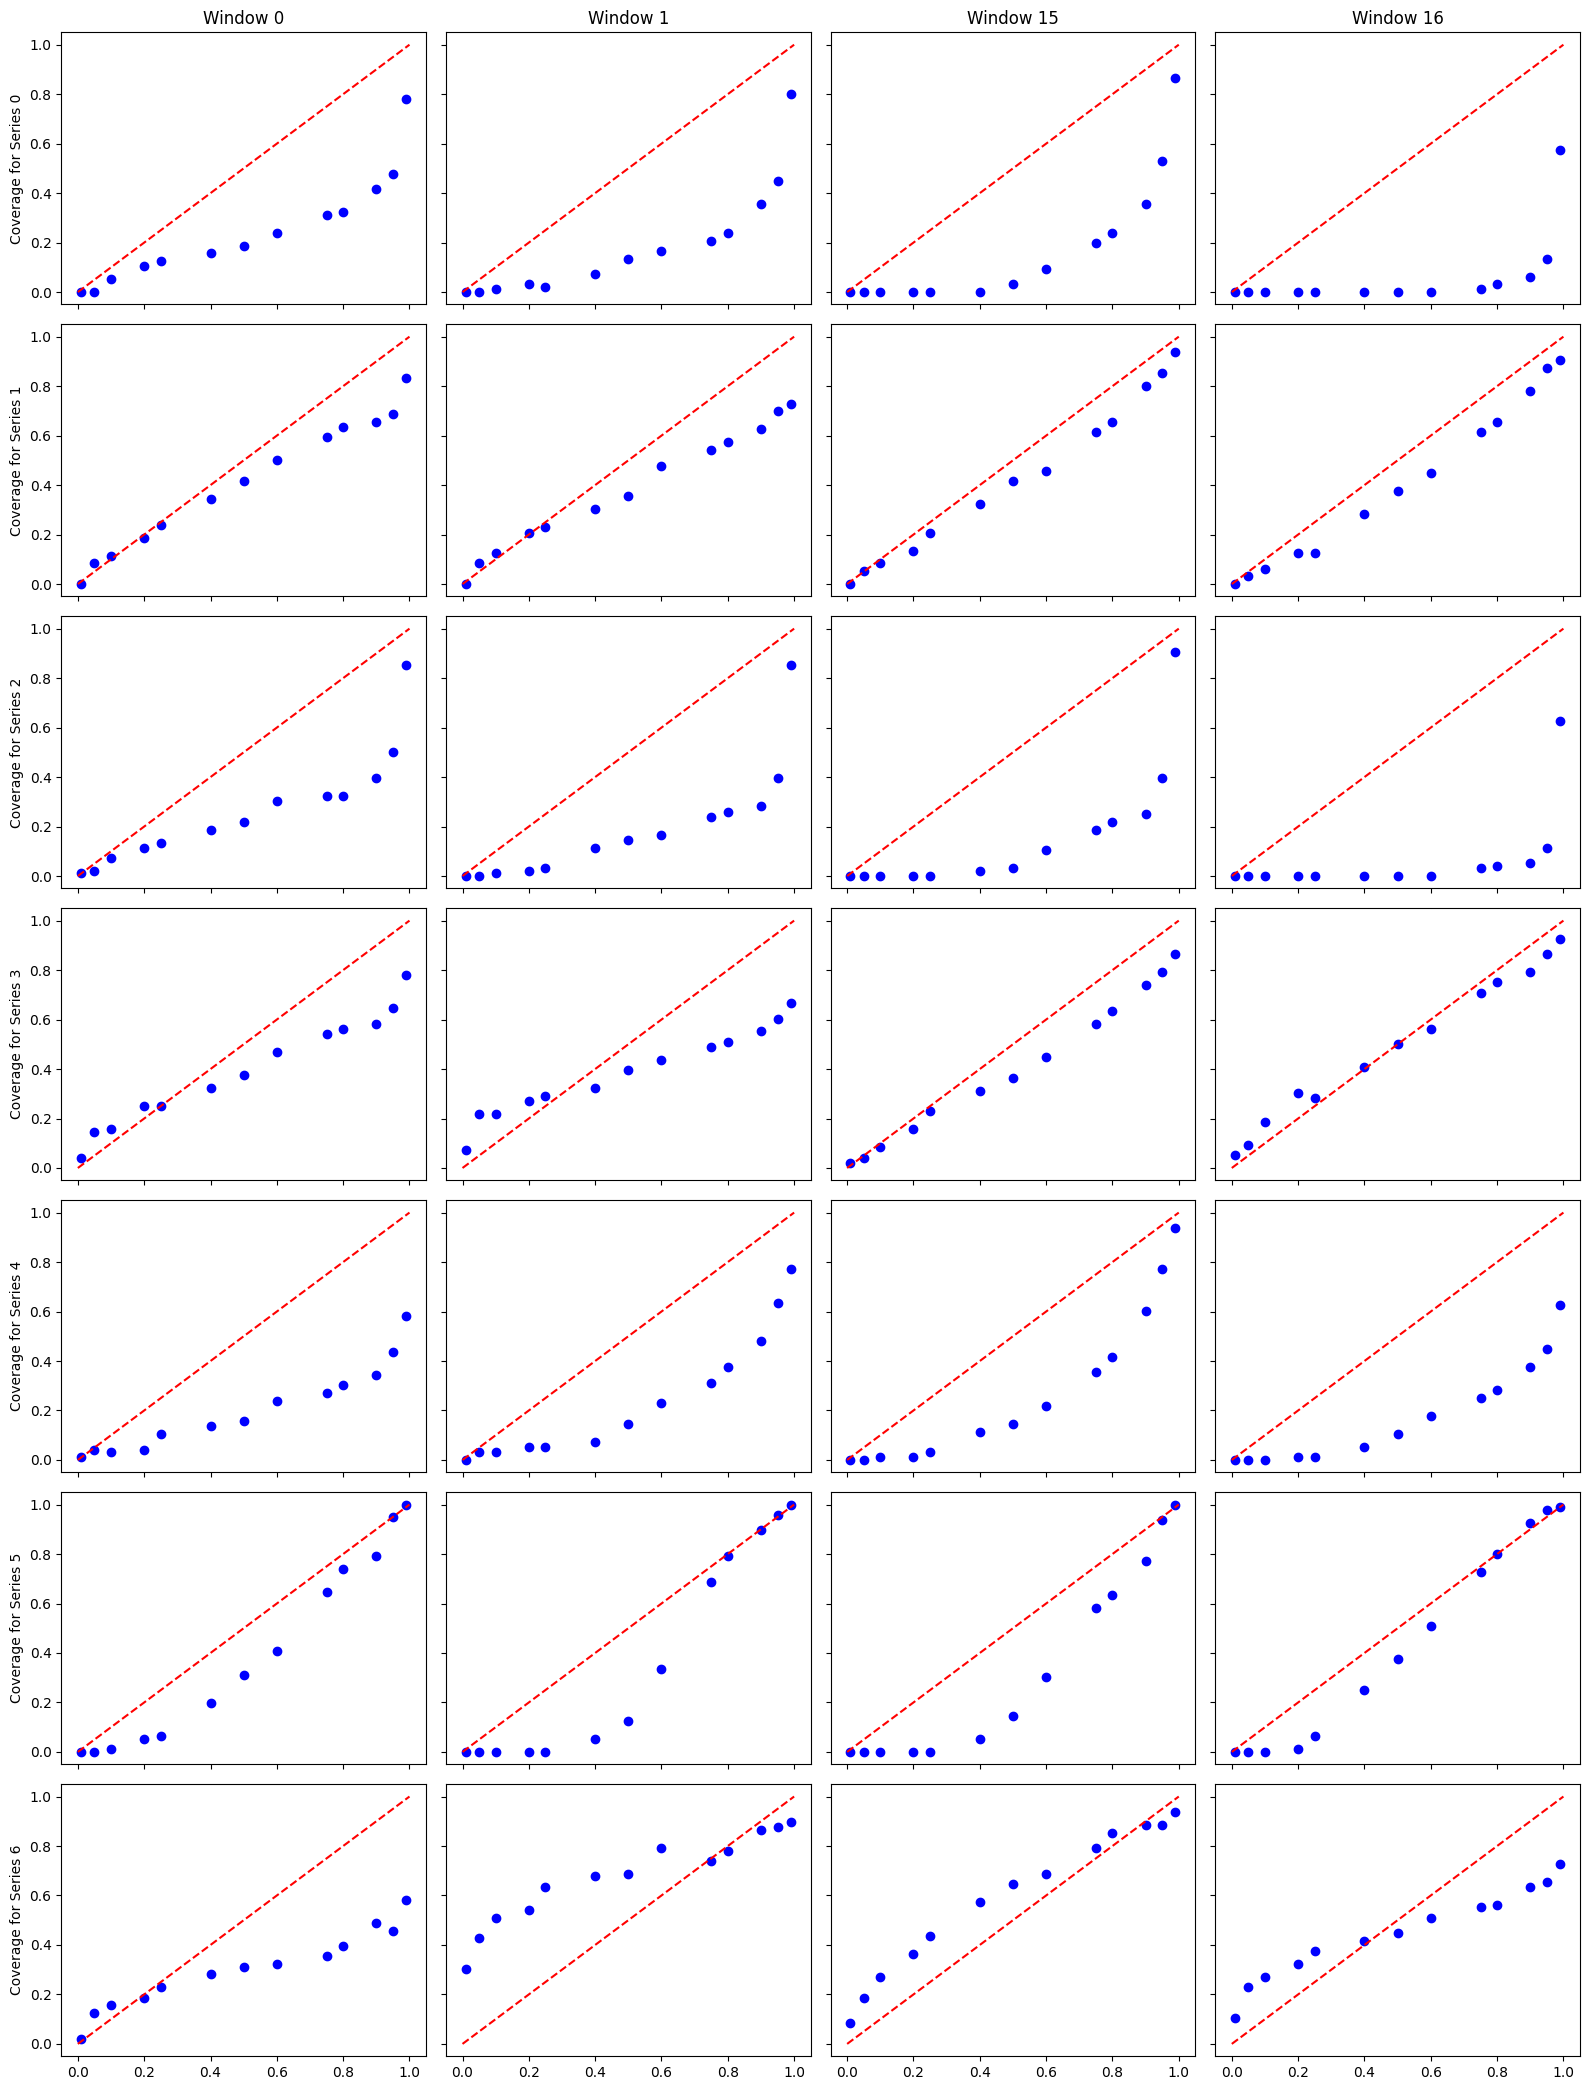

In [9]:
quantile_levels = [0.01, 0.05, 0.1, 0.2, 0.25, 0.4, 0.5, 0.6, 0.75, 0.8, 0.9, 0.95, 0.99]
plot_qq_coverage(future_actuals, predictions, windows=[0, 1, 15, 16], series=[0, 1, 2, 3, 4, 5, 6], quantile_levels=quantile_levels, quantile_regression=True)#, version='upper')

# old

In [ ]:
!export CUDA_VISIBLE_DEVICES=0

In [ ]:
import yaml
import os 

def update_nested_dict(base_dict, key_path, value):
    """Recursively update a nested dictionary given a dot-separated key."""
    keys = key_path.split(".")
    d = base_dict
    for k in keys[:-1]:  # Traverse the dictionary
        if k not in d:
            d[k] = {}  # Create nested dictionaries if they don't exist
        d = d[k]
    d[keys[-1]] = value  # Set the final value

DATASET = 'etth1'
MODEL = 'patchtst'
args={'config': f'config/ltsf/{DATASET}/{MODEL}.yaml', 
        'seed_everything':0,
       'data.data_manager.init_args.path': './datasets',
       'trainer.default_root_dir': './log_dir',
       'data.data_manager.init_args.dataset':f'{DATASET}',
       'data.data_manager.init_args.split_val': True,
       'trainer.max_epochs':50,
       'data.data_manager.init_args.context_length':96,
       'data.data_manager.init_args.prediction_length':96}

yaml_config_path = f'/home/kreffert/Probabilistic_LTSF/ProbTS/{args["config"]}'
with open(yaml_config_path, "r") as f:
    yaml_config = yaml.safe_load(f)
# Merge the CLI arguments into the YAML config
for key, value in args.items():
    if key == "config":  # Skip the config file path
        continue
    update_nested_dict(yaml_config, key, value)

In [ ]:
import os
os.chdir("/home/kreffert/Probabilistic_LTSF/ProbTS")
from probts.data import DataManager, ProbTSDataModule
data_manager = DataManager(**yaml_config["data"]["data_manager"]["init_args"])
# data_manager.prepare_dataset()
data_module = ProbTSDataModule(data_manager= data_manager, 
                               batch_size= yaml_config["data"]['batch_size'],
                                test_batch_size= yaml_config["data"]['test_batch_size'],
                                num_workers= yaml_config["data"]['num_workers'])

train_loader = data_module.train_dataloader
val_loader = data_module.val_dataloader
test_loader = data_module.test_dataloader

In [ ]:
data_to_model_link_args = ["scaler",
                            "train_pred_len_list", ]
data_to_forecaster_link_args = [
    "target_dim",
    "history_length",
    "context_length",
    "prediction_length",
    "train_pred_len_list", 
    "lags_list",
    "freq",
    "time_feat_dim",
    "global_mean",
    "dataset"
]

for arg in data_to_forecaster_link_args:
    if arg in dir(data_manager):
        yaml_config['model']['forecaster']['init_args'][arg]=getattr(data_manager, arg)

for arg in data_to_model_link_args:
    if arg in dir(data_manager):
        yaml_config['model'][arg] = getattr(data_manager, arg)

In [ ]:
# print(yaml_config['model'])
# print(yaml_config['model']['forecaster']['init_args'])


model_args = {k: v for k, v in yaml_config["model"].items() if k != 'forecaster'}
model_args.update(yaml_config['model']['forecaster']['init_args'])
print(model_args)

In [ ]:
from probts.model.forecast_module import ProbTSForecastModule
from probts.model.forecaster.point_forecaster import PatchTST
forecaster = PatchTST(**yaml_config["model"]['forecaster']['init_args'])
path="/home/kreffert/Probabilistic_LTSF/ProbTS/log_dir/etth1_PatchTST_CTX96_PRED96_seed0/ckpt/epoch=30-val_CRPS=0.335570.ckpt"
model = ProbTSForecastModule.load_from_checkpoint(path, **model_args)#**yaml_config['model']['forecaster']['init_args'],**{k: v for k, v in yaml_config["model"].items() if k != 'forecaster'})
# model = ProbTSForecastModule(forecaster=forecaster, 
#                              **{k: v for k, v in yaml_config["model"].items() if k != 'forecaster'})
# model = model.load_from_checkpoint(path, **{k: v for k, v in yaml_config["model"].items() if k != 'forecaster'})

In [ ]:
path="/home/kreffert/Probabilistic_LTSF/ProbTS/log_dir/etth1_PatchTST_CTX96_PRED96_seed0/ckpt/epoch=30-val_CRPS=0.335570.ckpt"

model = ProbTSForecastModule.load_from_checkpoint(
                path, 
                scaler=data_module.data_manager.scaler,
                context_length=data_module.data_manager.context_length,
                target_dim=data_module.data_manager.target_dim,
                freq=data_module.data_manager.freq,
                prediction_length=data_module.data_manager.prediction_length,
                lags_list=data_module.data_manager.lags_list,
                time_feat_dim=data_module.data_manager.time_feat_dim,
                # sampling_weight_scheme=self.model.sampling_weight_scheme,
            )

In [ ]:
print(type(model))

In [ ]:
import pytorch_lightning as pl

# Initialize the PyTorch Lightning trainer
trainer = pl.Trainer(
    max_epochs=10,            # Specify the number of epochs
    #gpus=1,                   # Use a GPU, set to `None` or `0` for CPU
    precision=16,             # Mixed precision training, optional
    #accumulate_grad_batches=1 # Gradient accumulation, optional
)

# Train the model using the fit method
trainer.fit(
    model,   # Your validation DataLoader
)